### Read vec files

In [1]:
f = open('./rep-vec')
lines = f.readlines()
f.close()

### Get labels and vectors

In [37]:
labels, vectors = [0] * len(lines), [0] * len(lines)
for th, line in enumerate(lines):
    tokens = line.split()
    label = int(tokens[0])
    vector = [float(v) for v in tokens[1:]]
    labels[th] = label
    vectors[th] = vector

### 2D approximate visualization

In [14]:
# Get 2D approximation with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(vectors)
pca_vectors = pca.transform(vectors)

In [34]:
import matplotlib.pyplot as plt

def draw_2d_vecs_with_labels(labels, vectors, annotate=True):
    # Draw plot
    for label, vector in zip(labels, vectors):
        # Draw vectors
        x, y = vector[0], vector[1]
        plt.scatter(x, y)
        if annotate:
            plt.annotate(label, 
                         xy=(x, y), 
                         xytext=(5, 2), 
                         textcoords='offset points', 
                         ha='right', 
                         va='bottom')
    plt.show()

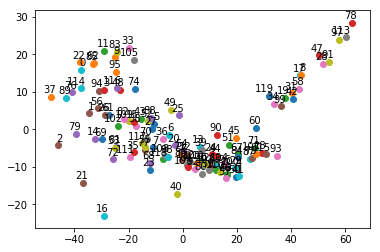

In [36]:
draw_2d_vecs_with_labels(labels, pca_vectors)

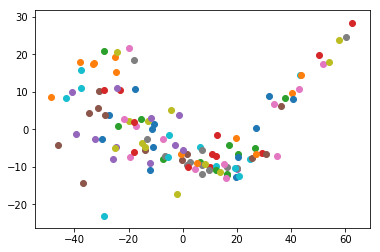

In [35]:
draw_2d_vecs_with_labels(labels, pca_vectors, annotate=False)

### etc

In [41]:
# Save labels and vectors
import numpy as np
np.savetxt('./labels.tsv', labels, fmt='%d', delimiter='\t')
np.savetxt('./vectors.tsv', vectors, fmt='%.4lf', delimiter='\t')